In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
week1 = pd.read_csv('tracking_week_1.csv')
week2 = pd.read_csv('tracking_week_2.csv')
week3 = pd.read_csv('tracking_week_3.csv')
week4 = pd.read_csv('tracking_week_4.csv')
week5 = pd.read_csv('tracking_week_5.csv')
week6 = pd.read_csv('tracking_week_6.csv')
week7 = pd.read_csv('tracking_week_7.csv')
week8 = pd.read_csv('tracking_week_8.csv')
week9 = pd.read_csv('tracking_week_9.csv')

tracking = week1.append([week2,week3,week4,week5,week6,week7,week8,week9])
tracking

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150018,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle
1150019,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN
1150020,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN
1150021,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN


In [3]:
del week1, week2, week3, week4, week5, week6, week7, week8, week9

In [4]:
# Standardizing tracking data so its always in direction of kicking team vs raw on-field coordinates.

# make all plays go from left to right
tracking.loc[tracking['playDirection']=='left', 'x'] = 120 - tracking.loc[tracking['playDirection']=='left', 'x']
tracking.loc[tracking['playDirection']=='left', 'y'] = (160/3) - tracking.loc[tracking['playDirection']=='left', 'y']
tracking.loc[tracking['playDirection']=='left', 'dir'] = tracking.loc[tracking['playDirection']=='left', 'dir'] + 180

# flip player direction and orientation
tracking.loc[tracking['dir'] > 360, 'dir'] = tracking.loc[tracking['dir'] > 360, 'dir'] - 360
tracking.loc[tracking['playDirection']=='left', 'o'] = tracking.loc[tracking['playDirection']=='left', 'o'] + 180
tracking.loc[tracking['o'] > 360, 'o'] = tracking.loc[tracking['o'] > 360, 'o'] - 360
tracking

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150018,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle
1150019,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN
1150020,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN
1150021,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN


In [5]:
plays = pd.read_csv('plays.csv')
plays

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,WAS,39,13:31,0,0,NaN,NaN,NaN,1,1,N,49,SINGLEBACK,6.0,0.577800,0.638600,0.361400,-0.011542,0.011542,3.642571,-0.504018,NaN,NaN,NaN,NaN
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,SEA,30,6:08,17,16,C,0.0,NaN,2,2,N,40,SINGLEBACK,7.0,0.298983,0.615241,0.384759,-0.025458,0.025458,1.434580,-0.444642,NaN,NaN,NaN,NaN
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,CIN,41,9:35,26,21,NaN,NaN,NaN,6,6,N,69,SHOTGUN,6.0,0.639439,0.667054,0.332946,-0.005164,0.005164,2.115356,0.203819,NaN,NaN,NaN,NaN
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,TEN,34,2:02,17,24,NaN,NaN,NaN,-2,-2,N,44,SHOTGUN,6.0,0.518695,0.410611,0.589389,-0.046648,0.046648,3.946232,-0.976039,NaN,NaN,NaN,NaN


In [6]:
final = pd.merge(tracking, plays, on=['gameId', 'playId'], how='inner')
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN
12187394,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN
12187395,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN
12187396,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN


In [7]:
del tracking

In [8]:
players = pd.read_csv('players.csv', usecols=['nflId', 'height', 'weight', 'position'])
players

,nflId,height,weight,position
0,25511,6-4,225,QB
1,29550,6-4,328,T
2,29851,6-2,225,QB
3,30842,6-6,267,TE
4,33084,6-4,217,QB
...,...,...,...,...
1678,55200,6-6,266,DT
1679,55212,6-0,230,ILB
1680,55239,6-2,300,DT
1681,55240,6-1,185,CB


In [9]:
final = pd.merge(final, players, on=['nflId'], how='left')
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12187394,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12187395,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12187396,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,1

In [10]:
tackles = pd.read_csv('tackles.csv')
tackles

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1
17422,2022092502,3510,42406,0,0,0,1
17423,2022091113,3642,43478,0,0,0,1
17424,2022091901,3578,42431,0,0,0,1


In [11]:
tackles = tackles.rename(columns={
    'nflId': 'tackler_nflId'
})
tackles

,gameId,playId,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1
17422,2022092502,3510,42406,0,0,0,1
17423,2022091113,3642,43478,0,0,0,1
17424,2022091901,3578,42431,0,0,0,1


In [12]:
final = pd.merge(final, tackles, on=['gameId', 'playId'], how='left')
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18817324,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0
18817325,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0
18817326,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,

In [13]:
final['IsTackler'] = (final['tackler_nflId'] == final['nflId']).astype(int)
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18817324,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0
18817325,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0
18817326,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.0722

In [14]:
final['IsBallCarrier'] = (final['ballCarrierId'] == final['nflId']).astype(int)
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18817324,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0,0
18817325,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0,0
18817326,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.

In [15]:
final['tackle_made'] = final['event'].apply(lambda x: 1 if x == 'tackle' else 0)
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18817324,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0,0,1
18817325,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0,0,0
18817326,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SH

In [16]:
final = final.drop_duplicates(subset=['nflId', 'gameId', 'playId', 'frameId', 'displayName'])
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18817324,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0,0,1
18817325,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0,0,0
18817326,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SH

In [17]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Filter rows of IsBallCarrier
bc_data = final[final['IsBallCarrier'] == 1]

# Create a dictionary to store ball carrier data by gameId, playId, and frameId
bc_data_dict = {}
for _, row in tqdm(bc_data.iterrows()):
    game_id = row['gameId']
    play_id = row['playId']
    frame_id = row['frameId']
    nfl_id = row['nflId']
    bc_data_dict[(game_id, play_id, frame_id)] = {
        'o': row['o'],
        'dir': row['dir'],
        'dis': row['dis'],
        'x': row['x'],
        'y': row['y'],
        's': row['s'],
        'a': row['a']
    }

# Create new columns in the original DataFrame
tqdm.pandas()
final['ballcarrier_o'] = final.progress_apply(lambda row: bc_data_dict.get((row['gameId'], row['playId'], row['frameId']), {}).get('o', np.nan), axis=1)
final['ballcarrier_dir'] = final.progress_apply(lambda row: bc_data_dict.get((row['gameId'], row['playId'], row['frameId']), {}).get('dir', np.nan), axis=1)
final['ballcarrier_dis'] = final.progress_apply(lambda row: bc_data_dict.get((row['gameId'], row['playId'], row['frameId']), {}).get('dis', np.nan), axis=1)
final['ballcarrier_x'] = final.progress_apply(lambda row: bc_data_dict.get((row['gameId'], row['playId'], row['frameId']), {}).get('x', np.nan), axis=1)
final['ballcarrier_y'] = final.progress_apply(lambda row: bc_data_dict.get((row['gameId'], row['playId'], row['frameId']), {}).get('y', np.nan), axis=1)
final['ballcarrier_s'] = final.progress_apply(lambda row: bc_data_dict.get((row['gameId'], row['playId'], row['frameId']), {}).get('s', np.nan), axis=1)
final['ballcarrier_a'] = final.progress_apply(lambda row: bc_data_dict.get((row['gameId'], row['playId'], row['frameId']), {}).get('a', np.nan), axis=1)
final

529879it [00:39, 13552.80it/s]
100%|████████████████████████████| 12187398/12187398 [03:45<00:00, 54144.83it/s]
/var/folders/0r/j35pxfh90v5blj__2gnj72_m0000gn/T/ipykernel_65941/2545579436.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['ballcarrier_o'] = final.progress_apply(lambda row: bc_data_dict.get((row['gameId'], row['playId'], row['frameId']), {}).get('o', np.nan), axis=1)
100%|████████████████████████████| 12187398/12187398 [03:29<00:00, 58255.98it/s]
/var/folders/0r/j35pxfh90v5blj__2gnj72_m0000gn/T/ipykernel_65941/2545579436.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18817324,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0,0,1,103.01,121.39,0.18,26.24,19.720000,1.60,4.04
18817325,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SH

In [18]:
# Define a function to calculate distance, orientation, and direction difference to the ballcarrier
def calculate_metrics(df):
    x1, y1, x2, y2 = df['x'], df['y'], df['ballcarrier_x'], df['ballcarrier_y']
    player_o, ballcarrier_o = df['o'], df['ballcarrier_o']
    player_dir, ballcarrier_dir = df['dir'], df['ballcarrier_dir']

    # Calculate the distance to the ballcarrier
    distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    # Calculate the absolute orientation difference relative to the ballcarrier
    angle_diff_o = np.abs(player_o - ballcarrier_o) % 360
    orientation_diff = angle_diff_o.where(angle_diff_o < (360 - angle_diff_o), 360 - angle_diff_o)

    # Calculate the absolute direction difference relative to the ballcarrier
    angle_diff_dir = np.abs(player_dir - ballcarrier_dir) % 360
    direction_diff = angle_diff_dir.where(angle_diff_dir < (360 - angle_diff_dir), 360 - angle_diff_dir)

    return pd.DataFrame({'dis_to_ballcarrier': distance,
                         'orientation_diff_to_ballcarrier': orientation_diff,
                         'direction_diff_to_ballcarrier': direction_diff})

# Calculate the metrics using NumPy vectorization
tqdm.pandas()
final_metrics = calculate_metrics(final)

# Combine the calculated metrics with the original DataFrame
final = pd.concat([final, final_metrics], axis=1)
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a,dis_to_ballcarrier,orientation_diff_to_ballcarrier,direction_diff_to_ballcarrier
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90,13.483816,91.69,41.48
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27,13.234145,96.76,42.55
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48,13.006721,103.82,47.35
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37,12.811690,111.66,51.55
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65,12.669021,115.29,57.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18817324,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washington right guard to NO...,4,1,10,NO,BAL,NO,11,0:23,13,27,NaN,NaN,NaN,5,5,N,21,SHOTGUN,4.0,0.818185,0.007404,0.992596,-0.007404,0.007404,0.072230,-0.07223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52578.0,1.0,0.0,0.0,0.0,0,0,1,103.01,121.39,0.18,26.24,19.720000,1.60,4.04,0.044721,NaN,NaN
18817325,2022110700,3787,NaN,football,4

In [19]:
# Function to calculate the distance to the football and add football's position, speed, and distance
def calculate_distance_to_football(df):
    # Create a subset DataFrame containing only the football rows
    football_df = df[df['club'] == 'football'][['gameId', 'playId', 'frameId', 'x', 'y', 's', 'dis']]
    football_df = football_df.rename(columns={'x': 'football_x', 'y': 'football_y', 's': 'football_s', 'dis': 'football_dis'})

    # Merge the football data back into the main DataFrame on gameId, playId, and frameId
    df = df.merge(football_df, on=['gameId', 'playId', 'frameId'], how='left')

    # Calculate the Euclidean distance between the player and the football
    df['distance_to_football'] = np.sqrt((df['x'] - df['football_x']) ** 2 + (df['y'] - df['football_y']) ** 2)

    return df

# Apply the function to your DataFrame
final = calculate_distance_to_football(final)
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a,dis_to_ballcarrier,orientation_diff_to_ballcarrier,direction_diff_to_ballcarrier,football_x,football_y,football_s,football_dis,distance_to_football
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90,13.483816,91.69,41.48,34.949997,19.523332,22.209999,2.07,7.334439
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27,13.234145,96.76,42.55,36.849998,18.503332,20.900000,2.16,9.359082
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48,13.006721,103.82,47.35,38.260002,17.743333,19.000000,1.60,10.960330
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37,12.811690,111.66,51.55,39.860001,16.883333,17.280001,1.81,12.784855
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65,12.669021,115.29,57.59,40.709999,16.403333,13.360000,0.98,13.839862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washingto

In [20]:
final = final.drop_duplicates(subset=['nflId', 'gameId', 'playId', 'frameId', 'displayName'])
final

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a,dis_to_ballcarrier,orientation_diff_to_ballcarrier,direction_diff_to_ballcarrier,football_x,football_y,football_s,football_dis,distance_to_football
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90,13.483816,91.69,41.48,34.949997,19.523332,22.209999,2.07,7.334439
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27,13.234145,96.76,42.55,36.849998,18.503332,20.900000,2.16,9.359082
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48,13.006721,103.82,47.35,38.260002,17.743333,19.000000,1.60,10.960330
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37,12.811690,111.66,51.55,39.860001,16.883333,17.280001,1.81,12.784855
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65,12.669021,115.29,57.59,40.709999,16.403333,13.360000,0.98,13.839862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle,43525,Dwayne Washington,(:23) (Shotgun) D.Washingto

In [21]:
import numpy as np
from tqdm import tqdm
import pandas as pd

# Add progress bar to pandas apply function
tqdm.pandas()

# Define parameters
sigma = 10  # Influence decay factor (tunable)
v_max = 9.5  # Maximum speed for normalization (assumed ~9.5 yards/sec)

# Function to calculate player influence based on pre-existing ball carrier data
def calculate_player_influence(row):
    # Use the pre-calculated distance, direction, and orientation differences
    distance_to_ball_carrier = row['dis_to_ballcarrier']
    orientation_diff = row['orientation_diff_to_ballcarrier']
    direction_diff = row['direction_diff_to_ballcarrier']
    player_speed = row['s']
    
    # Influence decays with distance, scales with speed, and adjusts for directional difference
    influence = (
        np.exp(-distance_to_ball_carrier ** 2 / (2 * sigma ** 2))  # Distance influence (Gaussian decay)
        * (player_speed / v_max)                                   # Speed influence
        * np.cos(np.radians(direction_diff))                       # Directional difference (cosine adjustment)
    )
    
    return influence

# Apply the function with a progress bar
final['player_influence'] = final.progress_apply(calculate_player_influence, axis=1)
final

100%|████████████████████████████| 12187398/12187398 [05:12<00:00, 39053.65it/s]


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a,dis_to_ballcarrier,orientation_diff_to_ballcarrier,direction_diff_to_ballcarrier,football_x,football_y,football_s,football_dis,distance_to_football,player_influence
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,31.630000,26.063333,1.62,1.15,0.16,51.74,327.90,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90,13.483816,91.69,41.48,34.949997,19.523332,22.209999,2.07,7.334439,0.051473
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,31.530000,26.203333,1.67,0.61,0.17,50.98,328.53,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27,13.234145,96.76,42.55,36.849998,18.503332,20.900000,2.16,9.359082,0.053946
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,31.440000,26.323333,1.57,0.49,0.15,50.98,327.05,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48,13.006721,103.82,47.35,38.260002,17.743333,19.000000,1.60,10.960330,0.048055
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,31.360000,26.433333,1.44,0.89,0.14,52.38,325.42,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37,12.811690,111.66,51.55,39.860001,16.883333,17.280001,1.81,12.784855,0.041485
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,31.280000,26.533333,1.29,1.24,0.13,53.36,321.95,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-5,325.0,G,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65,12.669021,115.29,57.59,40.709999,16.403333,13.360000,0.98,13.839862,0.032620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187393,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,

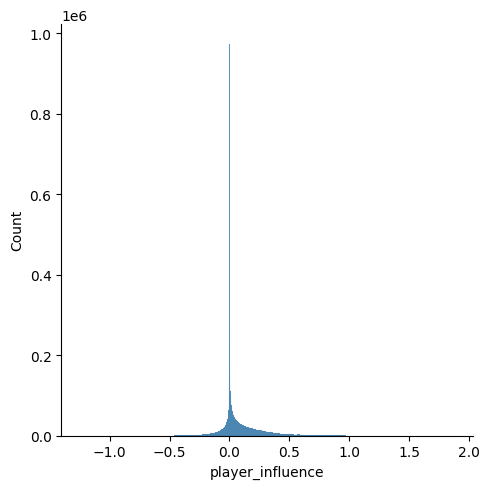

In [22]:
import seaborn as sns
sns.displot(final['player_influence']);

In [23]:
final['player_influence'].describe()

count    1.165851e+07
mean     9.005727e-02
std      1.791572e-01
min     -1.246615e+00
25%     -8.837228e-19
50%      2.978480e-02
75%      1.573896e-01
max      1.876124e+00
Name: player_influence, dtype: float64

### Player Influence Formula

The **player influence** can be calculated using the following formula:

\[
\text{Influence}_i = \exp\left(-\frac{d_i^2}{2\sigma^2}\right) \times \frac{v_i}{v_{\text{max}}} \times \cos\left(\theta_i\right)
\]

Where:
- \( d_i \) is the distance between the player \( i \) and the ball carrier.
- \( \sigma \) is the influence decay factor, which controls how quickly the influence decays with distance.
- \( v_i \) is the speed of player \( i \).
- \( v_{\text{max}} \) is the maximum speed for normalization (assumed to be 9.5 yards/second).
- \( \theta_i \) is the directional difference between the player's movement direction and the direction towards the ball carrier.

### Explanation of Components:
1. **Distance Influence**: 
   \[
   \exp\left(-\frac{d_i^2}{2\sigma^2}\right)
   \]
   This term models how influence decays with increasing distance. Closer players have higher influence.

2. **Speed Influence**: 
   \[
   \frac{v_i}{v_{\text{max}}}
   \]
   Faster players exert more influence since they can reach different areas faster.

3. **Directional Influence**:
   \[
   \cos\left(\theta_i\right)
   \]
   Players moving towards the ball carrier exert more influence, and those moving away exert less influence.


In [24]:
defenders = final[final['club'] == final['defensiveTeam']]
defenders

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a,dis_to_ballcarrier,orientation_diff_to_ballcarrier,direction_diff_to_ballcarrier,football_x,football_y,football_s,football_dis,distance_to_football,player_influence
22,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,41.75,25.803333,1.24,3.81,0.11,184.20,151.67,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90,11.013632,135.85,142.29,34.949997,19.523332,22.209999,2.07,9.256266,-0.056304
23,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,41.80,25.643333,1.78,4.43,0.16,177.21,166.31,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27,10.246878,137.01,155.23,36.849998,18.503332,20.900000,2.16,8.688046,-0.100642
24,2022090800,56,38577.0,Bobby Wagner,3,2022-09-08 20:24:05.400000,45.0,LA,left,41.84,25.453333,2.21,4.20,0.20,176.04,172.83,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48,9.464486,131.12,158.43,38.260002,17.743333,19.000000,1.60,8.500617,-0.138237
25,2022090800,56,38577.0,Bobby Wagner,4,2022-09-08 20:24:05.500000,45.0,LA,left,41.86,25.203333,2.70,3.87,0.25,175.34,176.38,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37,8.646531,125.38,159.41,39.860001,16.883333,17.280001,1.81,8.557009,-0.183074
26,2022090800,56,38577.0,Bobby Wagner,5,2022-09-08 20:24:05.599999,45.0,LA,left,41.88,24.913333,3.05,3.19,0.29,170.87,177.25,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65,7.812074,127.20,157.71,40.709999,16.403333,13.360000,0.98,8.590053,-0.218940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606.0,Damarion Williams,40,2022-11-07 23:06:49.200000,22.0,BAL,right,33.45,29.730000,1.92,2.40,0.21,216.

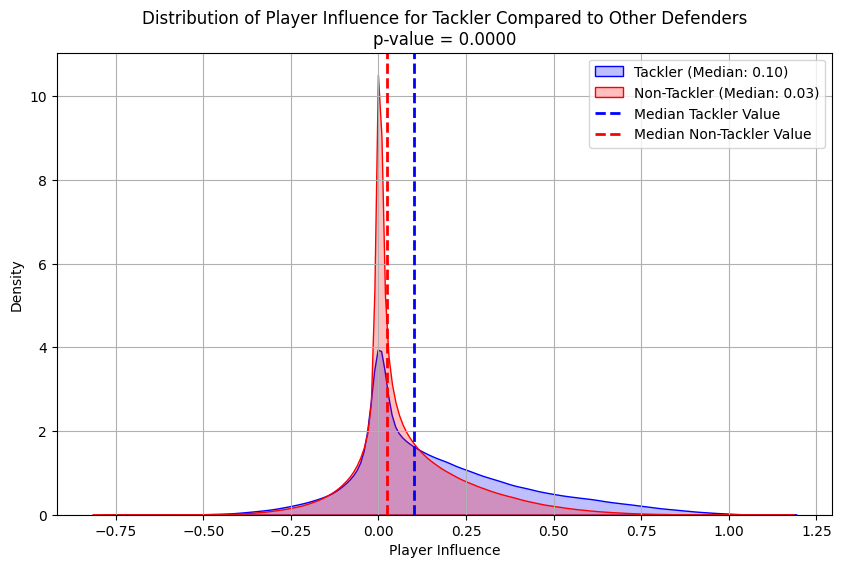

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

# Calculate medians
median_1 = defenders[defenders['IsTackler'] == 1]['player_influence'].median()
median_0 = defenders[defenders['IsTackler'] == 0]['player_influence'].median()

# Perform the Mann-Whitney U test to compare the two distributions
stat, p_value = mannwhitneyu(defenders[defenders['IsTackler'] == 1]['player_influence'], 
                             defenders[defenders['IsTackler'] == 0]['player_influence'], 
                             alternative='two-sided')

# Plot the distribution of player_influence when IsTackler is 1 and 0
plt.figure(figsize=(10, 6))

# Plot distributions using seaborn
sns.kdeplot(defenders[defenders['IsTackler'] == 1]['player_influence'], label=f'Tackler (Median: {median_1:.2f})', color='blue', fill=True)
sns.kdeplot(defenders[defenders['IsTackler'] == 0]['player_influence'], label=f'Non-Tackler (Median: {median_0:.2f})', color='red', fill=True)

# Add vertical lines for medians
plt.axvline(median_1, color='blue', linestyle='--', linewidth=2, label=f'Median Tackler Value')
plt.axvline(median_0, color='red', linestyle='--', linewidth=2, label=f'Median Non-Tackler Value')

# Add titles and labels
plt.title(f'Distribution of Player Influence for Tackler Compared to Other Defenders\np-value = {p_value:.4f}')
plt.xlabel('Player Influence')
plt.ylabel('Density')

# Show legend
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [26]:
tackles

,gameId,playId,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1
17422,2022092502,3510,42406,0,0,0,1
17423,2022091113,3642,43478,0,0,0,1
17424,2022091901,3578,42431,0,0,0,1


In [27]:
tackles_total = tackles.groupby('tackler_nflId')['tackle'].sum().reset_index()
tackles_total

,tackler_nflId,tackle
0,33131,8
1,35449,4
2,35452,6
3,35454,3
4,35459,28
...,...,...
795,55190,1
796,55200,1
797,55239,0
798,55240,2


In [28]:
tackles_total.columns = ['nflId', 'tackles']
tackles_total

,nflId,tackles
0,33131,8
1,35449,4
2,35452,6
3,35454,3
4,35459,28
...,...,...
795,55190,1
796,55200,1
797,55239,0
798,55240,2


In [29]:
defenders

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a,dis_to_ballcarrier,orientation_diff_to_ballcarrier,direction_diff_to_ballcarrier,football_x,football_y,football_s,football_dis,distance_to_football,player_influence
22,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,41.75,25.803333,1.24,3.81,0.11,184.20,151.67,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90,11.013632,135.85,142.29,34.949997,19.523332,22.209999,2.07,9.256266,-0.056304
23,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,41.80,25.643333,1.78,4.43,0.16,177.21,166.31,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27,10.246878,137.01,155.23,36.849998,18.503332,20.900000,2.16,8.688046,-0.100642
24,2022090800,56,38577.0,Bobby Wagner,3,2022-09-08 20:24:05.400000,45.0,LA,left,41.84,25.453333,2.21,4.20,0.20,176.04,172.83,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48,9.464486,131.12,158.43,38.260002,17.743333,19.000000,1.60,8.500617,-0.138237
25,2022090800,56,38577.0,Bobby Wagner,4,2022-09-08 20:24:05.500000,45.0,LA,left,41.86,25.203333,2.70,3.87,0.25,175.34,176.38,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37,8.646531,125.38,159.41,39.860001,16.883333,17.280001,1.81,8.557009,-0.183074
26,2022090800,56,38577.0,Bobby Wagner,5,2022-09-08 20:24:05.599999,45.0,LA,left,41.88,24.913333,3.05,3.19,0.29,170.87,177.25,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65,7.812074,127.20,157.71,40.709999,16.403333,13.360000,0.98,8.590053,-0.218940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606.0,Damarion Williams,40,2022-11-07 23:06:49.200000,22.0,BAL,right,33.45,29.730000,1.92,2.40,0.21,216.

In [30]:
games = pd.read_csv('games.csv')
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/06/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/06/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/06/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/06/2022,20:20:00,KC,TEN,20,17


In [31]:
final_df = defenders.merge(games, on='gameId')
final_df

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a,dis_to_ballcarrier,orientation_diff_to_ballcarrier,direction_diff_to_ballcarrier,football_x,football_y,football_s,football_dis,distance_to_football,player_influence,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,41.75,25.803333,1.24,3.81,0.11,184.20,151.67,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90,11.013632,135.85,142.29,34.949997,19.523332,22.209999,2.07,9.256266,-0.056304,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,41.80,25.643333,1.78,4.43,0.16,177.21,166.31,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27,10.246878,137.01,155.23,36.849998,18.503332,20.900000,2.16,8.688046,-0.100642,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
2,2022090800,56,38577.0,Bobby Wagner,3,2022-09-08 20:24:05.400000,45.0,LA,left,41.84,25.453333,2.21,4.20,0.20,176.04,172.83,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48,9.464486,131.12,158.43,38.260002,17.743333,19.000000,1.60,8.500617,-0.138237,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
3,2022090800,56,38577.0,Bobby Wagner,4,2022-09-08 20:24:05.500000,45.0,LA,left,41.86,25.203333,2.70,3.87,0.25,175.34,176.38,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37,8.646531,125.38,159.41,39.860001,16.883333,17.280001,1.81,8.557009,-0.183074,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
4,2022090800,56,38577.0,Bobby Wagner,5,2022-09-08 20:24:05.599999,45.0,LA,left,41.88,24.913333,3.05,3.19,0.29,170.87,177.25,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65,7.812074,127.20,157.71,40.709999,16.403333,13.360000,0.98,8.590053,-0.218940,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [32]:
# Filter the dataframe for weeks 1 to 4
week_1_to_4_df = final_df[final_df['week'].isin([1, 2, 3, 4])]

# Calculate the sum of player influence for weeks 1 to 4
influence_1_to_4_df = week_1_to_4_df.groupby(['displayName', 'nflId', 'position'])['player_influence'].sum().reset_index()
influence_1_to_4_df.columns = ['displayName', 'nflId', 'position', 'player_influence_weeks_1_4']

# Filter the dataframe for weeks 5 to 8
week_5_to_8_df = final_df[final_df['week'].isin([5, 6, 7, 8])]

# Calculate the sum of player influence for weeks 5 to 8
influence_5_to_8_df = week_5_to_8_df.groupby(['displayName', 'nflId', 'position'])['player_influence'].sum().reset_index()
influence_5_to_8_df.columns = ['displayName', 'nflId', 'position', 'player_influence_weeks_5_8']

# Merge both DataFrames to have a single DataFrame with both columns
combined_influence_df = pd.merge(influence_1_to_4_df, influence_5_to_8_df, on=['displayName', 'nflId', 'position'], how='outer')

# Display the result
combined_influence_df.dropna(inplace=True)
combined_influence_df

,displayName,nflId,position,player_influence_weeks_1_4,player_influence_weeks_5_8
0,A'Shawn Robinson,43335.0,DT,521.479271,348.244900
1,A.J. Epenesa,52462.0,DE,191.883111,183.233939
2,A.J. Green,53018.0,CB,0.005857,23.080790
3,A.J. Terrell,52424.0,CB,449.324652,130.887831
4,Aaron Donald,41239.0,DT,408.124534,237.502149
...,...,...,...,...,...
739,Zach Cunningham,44869.0,ILB,350.931313,95.614353
740,Zach Sieler,46307.0,DT,545.292398,538.200939
741,Zachary Carter,54560.0,DT,240.693689,620.074136
742,Zaire Franklin,46304.0,OLB,912.700243,1060.757213


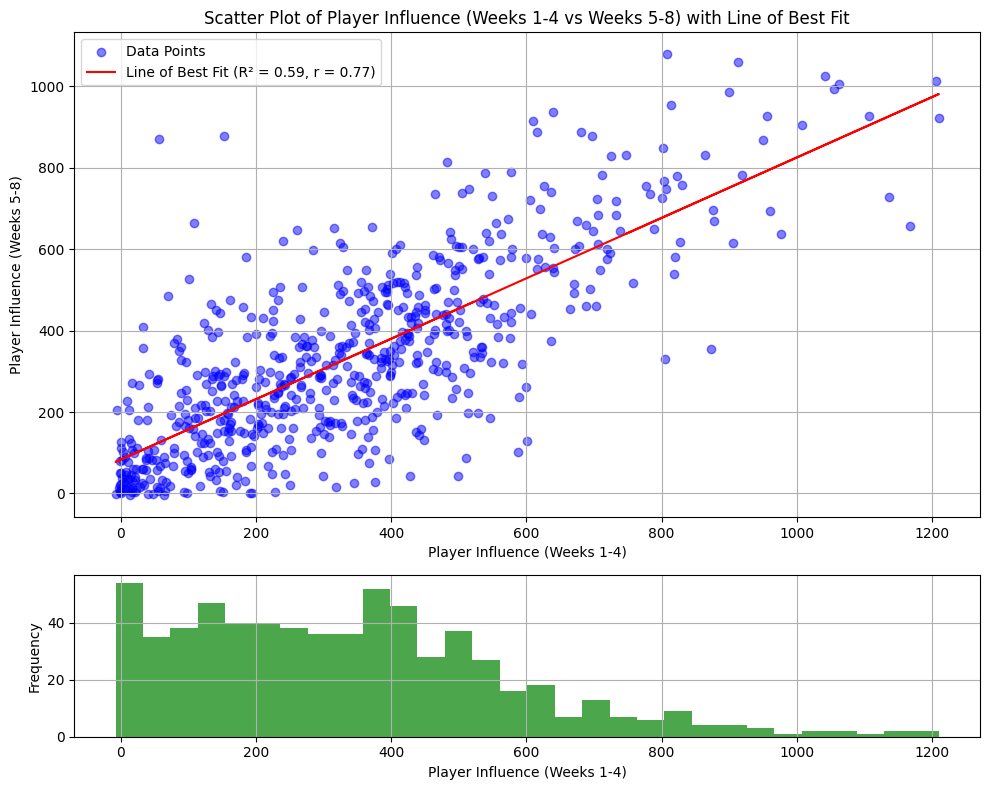

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.gridspec as gridspec

X = combined_influence_df['player_influence_weeks_1_4'].values.reshape(-1, 1)
y = combined_influence_df['player_influence_weeks_5_8'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values for the line of best fit
y_pred = model.predict(X)

# Calculate R-squared and Pearson's correlation coefficient
r_squared = r2_score(y, y_pred)
correlation = np.corrcoef(combined_influence_df['player_influence_weeks_1_4'], combined_influence_df['player_influence_weeks_5_8'])[0, 1]

# Create the scatter plot with histogram
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Scatter plot with line of best fit (top)
ax0 = fig.add_subplot(gs[0])
ax0.scatter(combined_influence_df['player_influence_weeks_1_4'], combined_influence_df['player_influence_weeks_5_8'], color='blue', alpha=0.5, label='Data Points')
ax0.plot(combined_influence_df['player_influence_weeks_1_4'], y_pred, color='red', label=f'Line of Best Fit (R² = {r_squared:.2f}, r = {correlation:.2f})')
ax0.set_title('Scatter Plot of Player Influence (Weeks 1-4 vs Weeks 5-8) with Line of Best Fit')
ax0.set_xlabel('Player Influence (Weeks 1-4)')
ax0.set_ylabel('Player Influence (Weeks 5-8)')
ax0.legend()
ax0.grid(True)

# Histogram of player influence for weeks 1-4 (bottom)
ax1 = fig.add_subplot(gs[1])
ax1.hist(combined_influence_df['player_influence_weeks_1_4'], bins=30, color='green', alpha=0.7)
ax1.set_xlabel('Player Influence (Weeks 1-4)')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [34]:
# Create a new DataFrame with each player (displayName), their position, and their average player influence
influence_df = defenders.groupby(['displayName', 'nflId', 'position'])['player_influence'].sum().reset_index()

# Rename the columns for clarity
influence_df.columns = ['displayName', 'nflId', 'position', 'cum_player_influence']

# Display the result
influence_df

,displayName,nflId,position,cum_player_influence
0,A'Shawn Robinson,43335.0,DT,942.780209
1,A.J. Epenesa,52462.0,DE,415.162184
2,A.J. Green,53018.0,CB,23.086648
3,A.J. Klein,40096.0,OLB,59.991352
4,A.J. Parker,53957.0,CB,389.651161
...,...,...,...,...
857,Zack Baun,52482.0,OLB,63.232414
858,Zaire Franklin,46304.0,OLB,2108.016818
859,Zaven Collins,53445.0,OLB,1857.382890
860,Zech McPhearson,53552.0,CB,81.793804


In [35]:
influence_df = influence_df.merge(tackles_total, on='nflId')
influence_df

,displayName,nflId,position,cum_player_influence,tackles
0,A'Shawn Robinson,43335.0,DT,942.780209,16
1,A.J. Epenesa,52462.0,DE,415.162184,1
2,A.J. Klein,40096.0,OLB,59.991352,3
3,A.J. Parker,53957.0,CB,389.651161,10
4,A.J. Terrell,52424.0,CB,580.212482,19
...,...,...,...,...,...
795,Zack Baun,52482.0,OLB,63.232414,1
796,Zaire Franklin,46304.0,OLB,2108.016818,55
797,Zaven Collins,53445.0,OLB,1857.382890,39
798,Zech McPhearson,53552.0,CB,81.793804,2


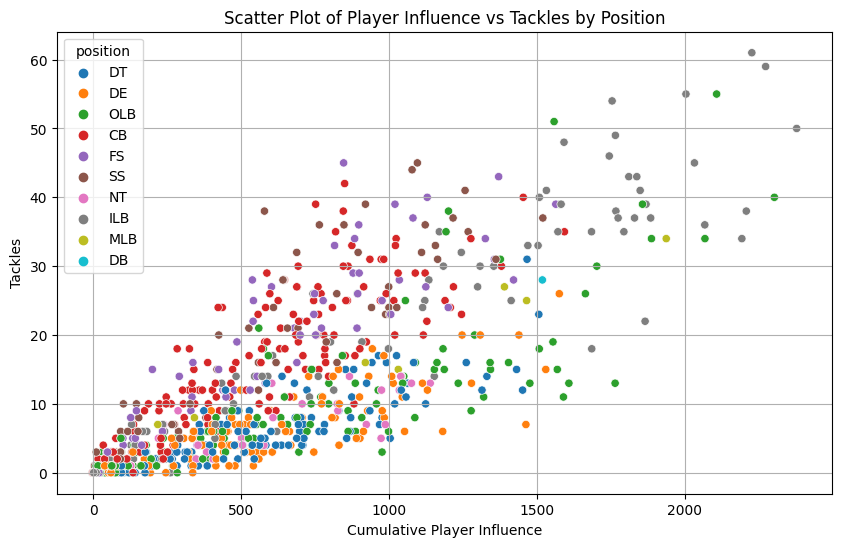

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot using seaborn
sns.scatterplot(x='cum_player_influence', y='tackles', hue='position', data=influence_df, palette='tab10')

# Add titles and labels
plt.title('Scatter Plot of Player Influence vs Tackles by Position')
plt.xlabel('Cumulative Player Influence')
plt.ylabel('Tackles')

# Display the plot
plt.grid(True)
plt.show()

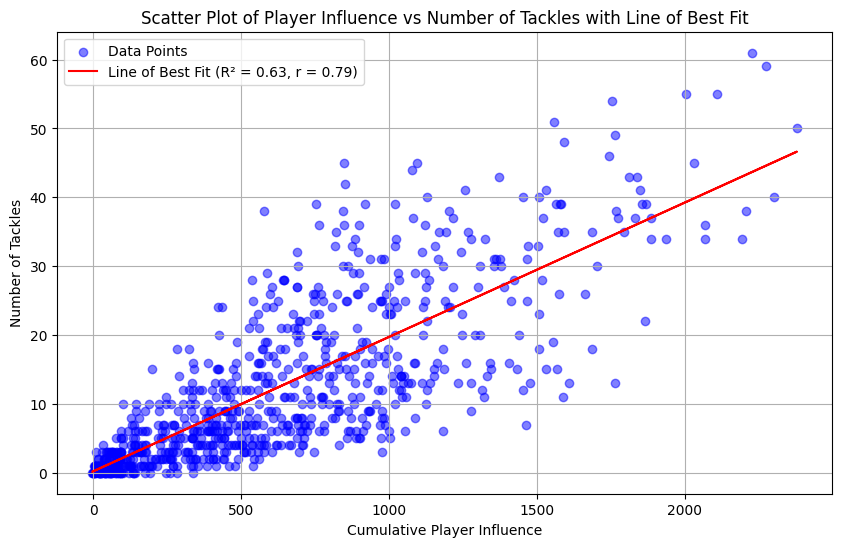

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data
X = influence_df['cum_player_influence'].values.reshape(-1, 1)  # Reshape for sklearn
y = influence_df['tackles'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values for the line of best fit
y_pred = model.predict(X)

# Calculate R-squared and Pearson's correlation coefficient
r_squared = r2_score(y, y_pred)
correlation = np.corrcoef(influence_df['cum_player_influence'], influence_df['tackles'])[0, 1]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(influence_df['cum_player_influence'], influence_df['tackles'], color='blue', alpha=0.5, label='Data Points')

# Plot the line of best fit
plt.plot(influence_df['cum_player_influence'], y_pred, color='red', label=f'Line of Best Fit (R² = {r_squared:.2f}, r = {correlation:.2f})')

# Add titles and labels
plt.title('Scatter Plot of Player Influence vs Number of Tackles with Line of Best Fit')
plt.xlabel('Cumulative Player Influence')
plt.ylabel('Number of Tackles')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

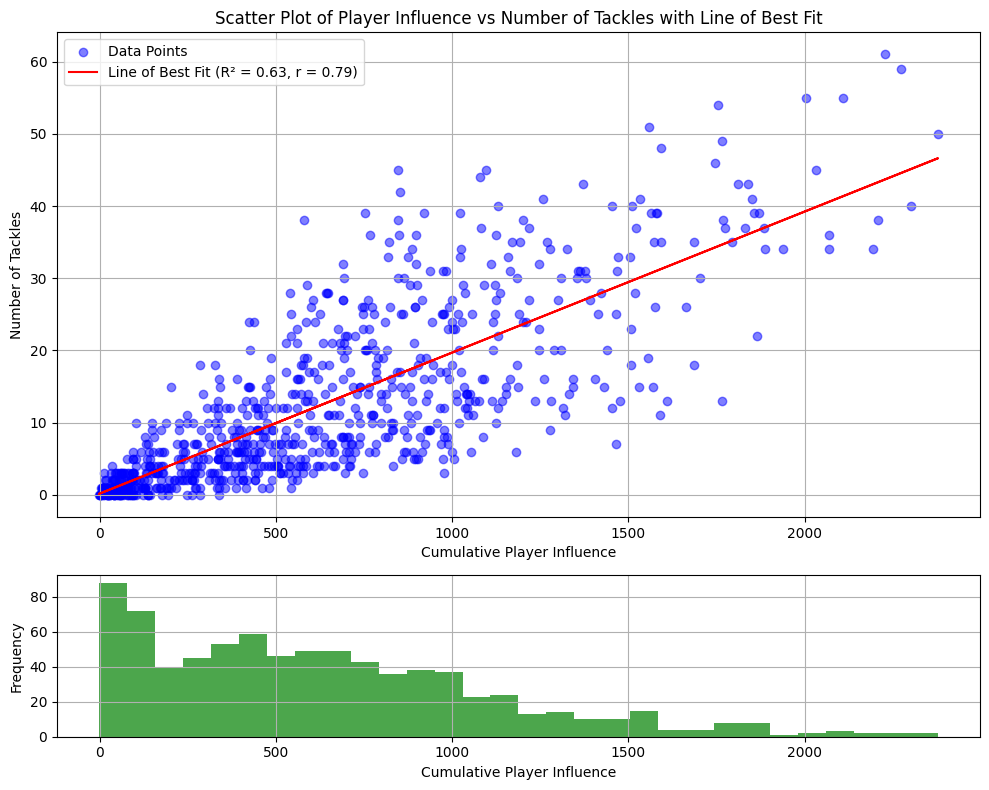

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.gridspec as gridspec

# Prepare the data
X = influence_df['cum_player_influence'].values.reshape(-1, 1)  # Reshape for sklearn
y = influence_df['tackles'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values for the line of best fit
y_pred = model.predict(X)

# Calculate R-squared and Pearson's correlation coefficient
r_squared = r2_score(y, y_pred)
correlation = np.corrcoef(influence_df['cum_player_influence'], influence_df['tackles'])[0, 1]

# Create the layout for scatter plot and histogram
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Scatter plot with line of best fit (top)
ax0 = fig.add_subplot(gs[0])
ax0.scatter(influence_df['cum_player_influence'], influence_df['tackles'], color='blue', alpha=0.5, label='Data Points')
ax0.plot(influence_df['cum_player_influence'], y_pred, color='red', label=f'Line of Best Fit (R² = {r_squared:.2f}, r = {correlation:.2f})')
ax0.set_title('Scatter Plot of Player Influence vs Number of Tackles with Line of Best Fit')
ax0.set_xlabel('Cumulative Player Influence')
ax0.set_ylabel('Number of Tackles')
ax0.legend()
ax0.grid(True)

# Histogram of cumulative player influence (bottom)
ax1 = fig.add_subplot(gs[1])
ax1.hist(influence_df['cum_player_influence'], bins=30, color='green', alpha=0.7)
ax1.set_xlabel('Cumulative Player Influence')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

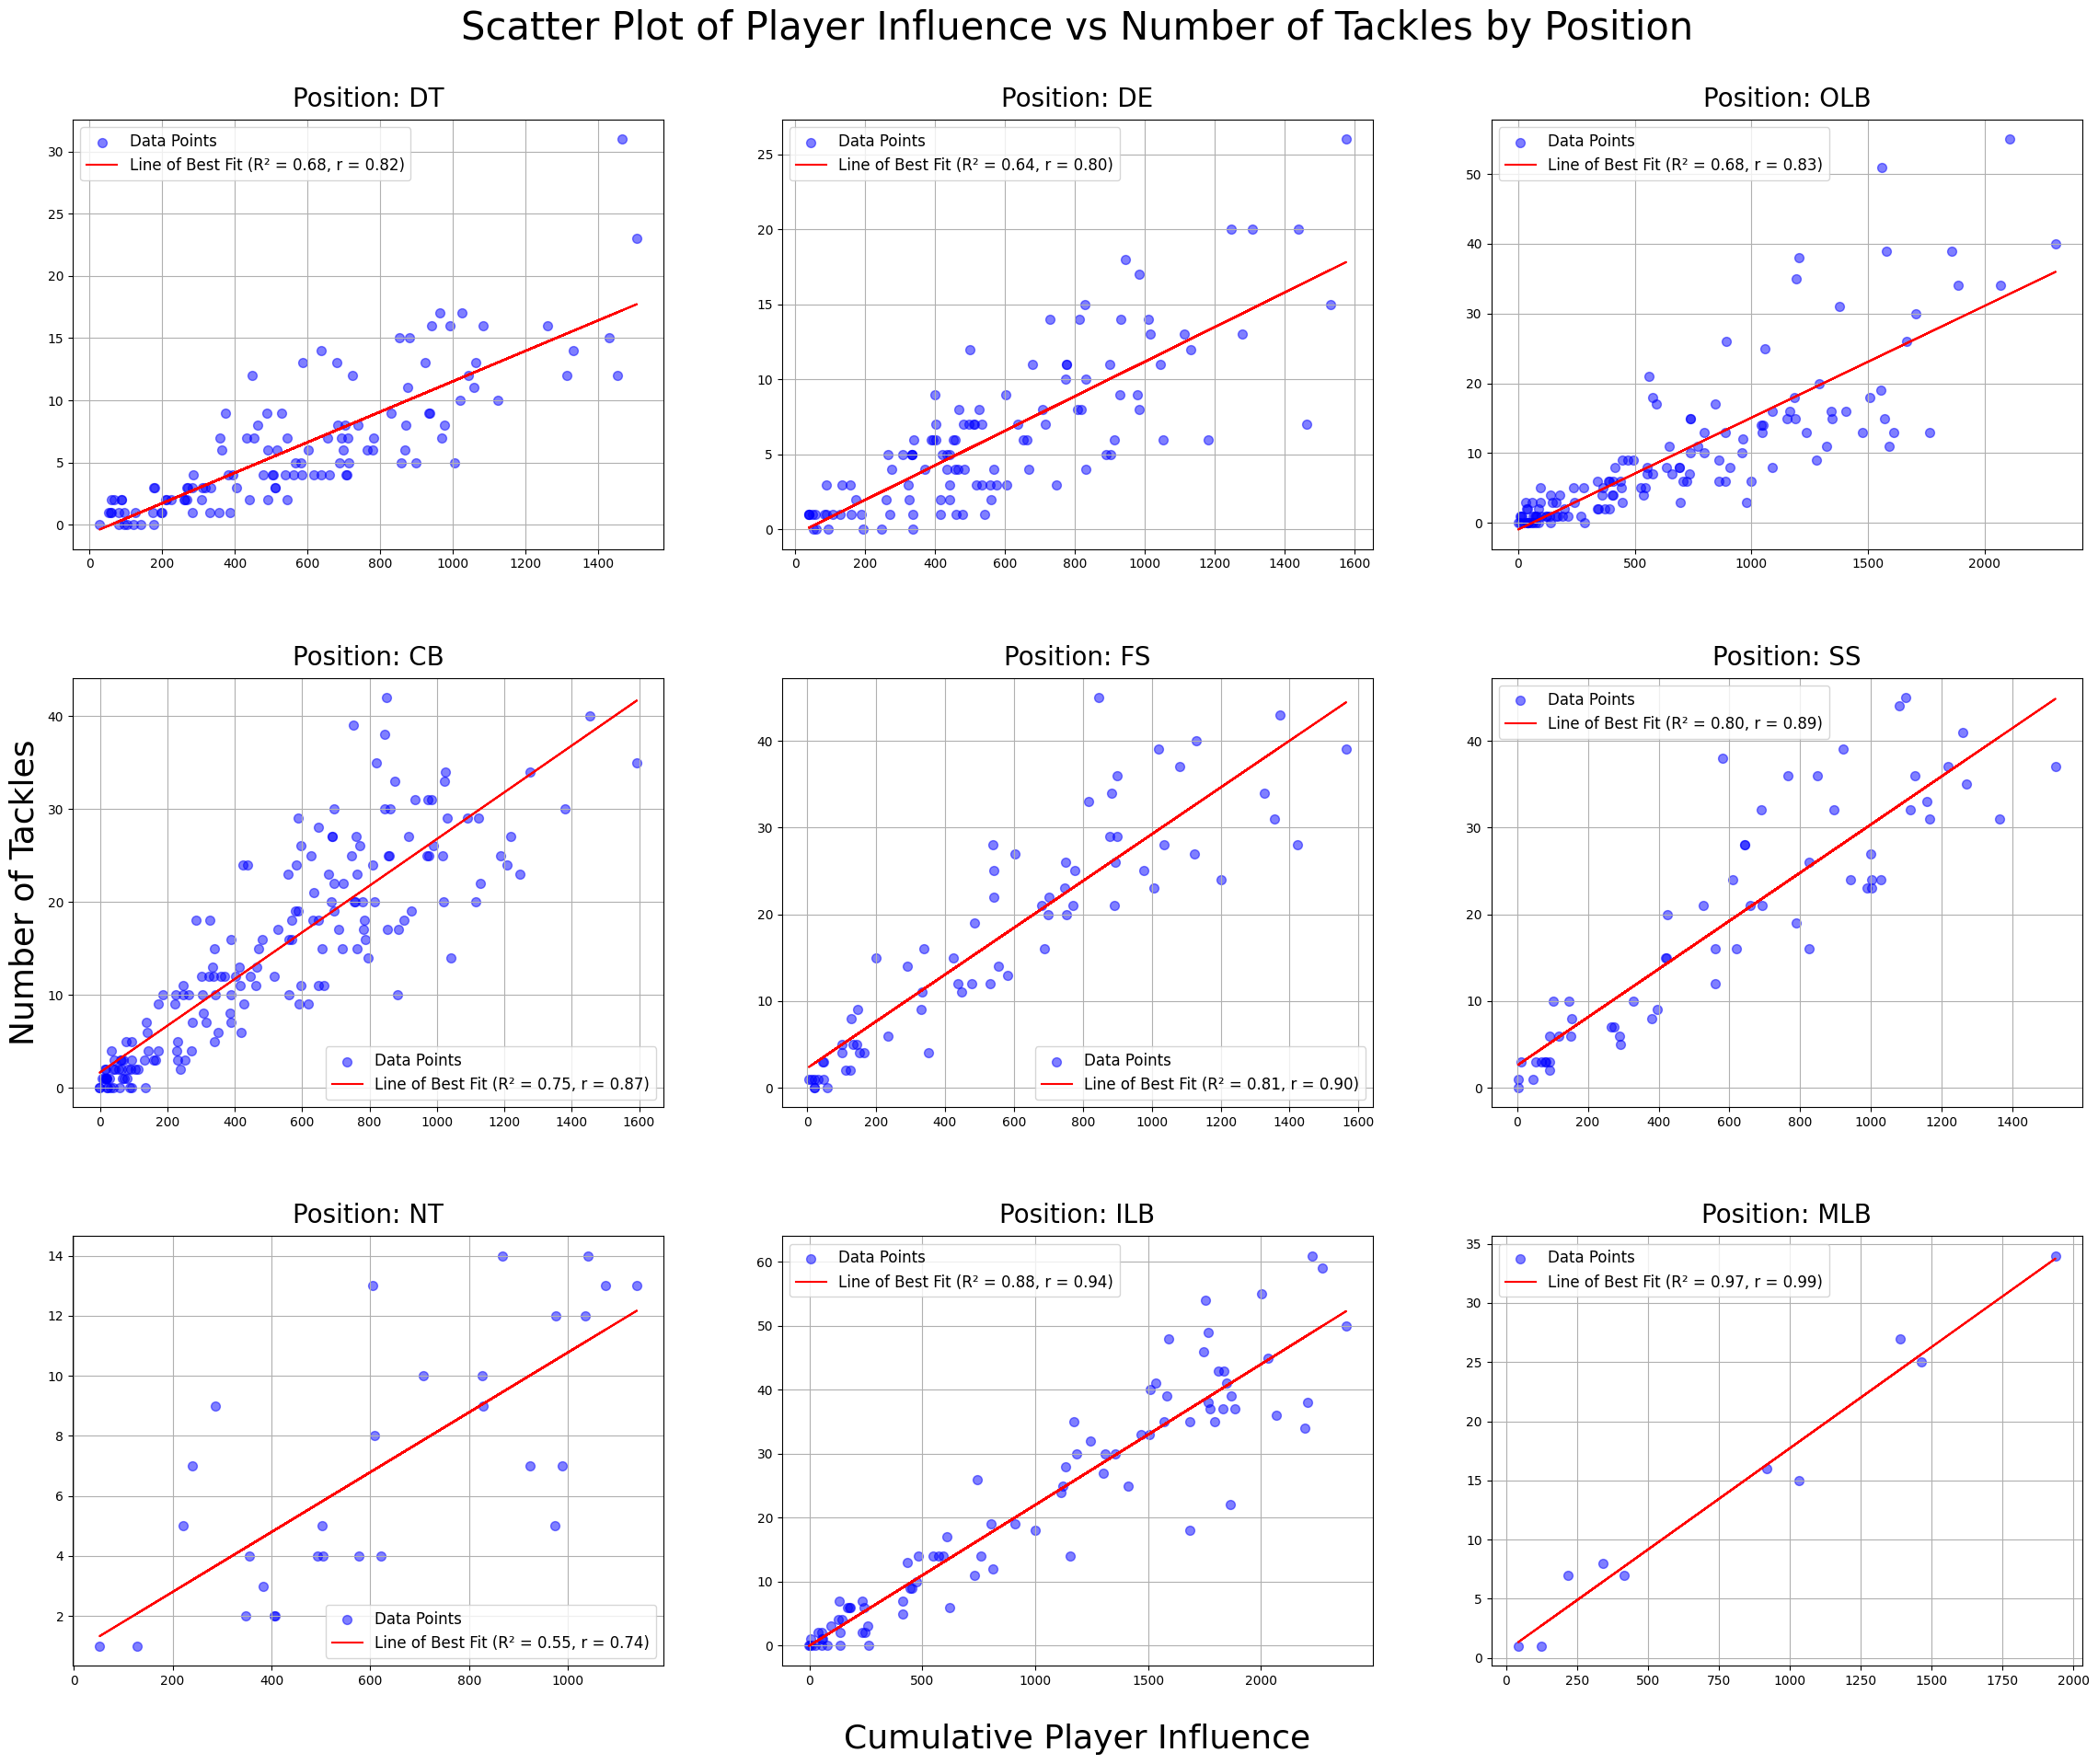

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'influence_df' is already defined and includes the 'position' column
positions = influence_df['position'].unique()

# Create subplots for each position with larger figure size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(26, 20))
axes = axes.flatten()

for i, pos in enumerate(positions):
    if i >= 9:  # Limit to 9 subplots
        break

    # Filter data for the current position
    pos_data = influence_df[influence_df['position'] == pos]
    X = pos_data['cum_player_influence'].values.reshape(-1, 1)
    y = pos_data['tackles'].values

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict y values for the line of best fit
    y_pred = model.predict(X)

    # Calculate R-squared and Pearson's correlation coefficient
    r_squared = r2_score(y, y_pred)
    correlation = np.corrcoef(pos_data['cum_player_influence'], pos_data['tackles'])[0, 1]

    # Create scatter plot for the current position with increased marker size
    axes[i].scatter(X, y, color='blue', alpha=0.5, label='Data Points', s=50)
    axes[i].plot(X, y_pred, color='red', label=f'Line of Best Fit (R² = {r_squared:.2f}, r = {correlation:.2f})')
    axes[i].set_title(f'Position: {pos}', fontsize=20, pad=10)  # Adjust title padding
    axes[i].grid(True)
    axes[i].legend(fontsize=12)

# Set common labels with larger font size
fig.text(0.5, 0.04, 'Cumulative Player Influence', ha='center', va='center', fontsize=26)
fig.text(0.06, 0.5, 'Number of Tackles', ha='center', va='center', rotation='vertical', fontsize=26)

# Adjust subplot parameters to reduce spacing
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.08, right=0.92, hspace=0.3, wspace=0.2)

plt.suptitle('Scatter Plot of Player Influence vs Number of Tackles by Position', fontsize=30, y=0.98)
plt.show()

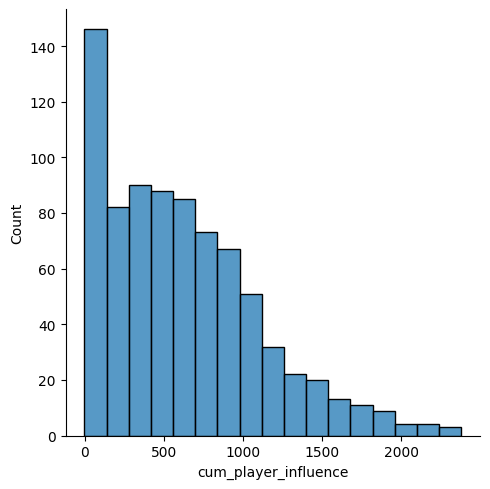

In [40]:
sns.displot(influence_df['cum_player_influence']);

In [41]:
# Function to get top 10 players by position
def get_top_10_by_position(df, position):
    return df[df['position'] == position].sort_values(by='cum_player_influence', ascending=False).head(20)

# Get the unique positions
positions = influence_df['position'].unique()

# Create a dictionary to store the top 10 players by position
top_10_by_position = {}

# Iterate over each position and get the top 10 players
for pos in positions:
    top_10_by_position[pos] = get_top_10_by_position(influence_df, pos)

# Display top 10 for each position
for pos, table in top_10_by_position.items():
    print(f"Top 10 players for position: {pos}")
    display(table)

Top 10 players for position: DT


,displayName,nflId,position,cum_player_influence,tackles
157,Christian Wilkins,47796.0,DT,1506.971486,23
308,Grover Stewart,44957.0,DT,1467.087727,31
451,Justin Jones,46153.0,DT,1452.137792,12
211,DeForest Buckner,43296.0,DT,1431.812183,15
63,B.J. Hill,46138.0,DT,1331.448346,14
249,Dexter Lawrence,47800.0,DT,1314.812298,12
793,Zach Sieler,46307.0,DT,1261.541275,16
193,Daron Payne,46082.0,DT,1124.324332,10
362,Jarran Reed,43338.0,DT,1083.791208,16
301,Grady Jarrett,42480.0,DT,1063.815041,13


Top 10 players for position: DE


,displayName,nflId,position,cum_player_influence,tackles
564,Maxx Crosby,47889.0,DE,1576.177679,26
219,Deatrich Wise,44944.0,DE,1530.425540,15
21,Al-Quadin Muhammad,45009.0,DE,1463.282560,7
685,Sam Hubbard,46146.0,DE,1439.668314,20
239,Derrick Brown,52415.0,DE,1308.939391,20
515,Leonard Floyd,43298.0,DE,1279.310604,13
224,Demarcus Lawrence,41263.0,DE,1247.415694,20
15,Aidan Hutchinson,54467.0,DE,1182.088911,6
640,Poona Ford,46487.0,DE,1130.329828,12
589,Montez Sweat,47809.0,DE,1113.493019,13


Top 10 players for position: OLB


,displayName,nflId,position,cum_player_influence,tackles
607,Nicholas Morrow,45345.0,OLB,2303.201796,40
796,Zaire Franklin,46304.0,OLB,2108.016818,55
512,Leighton Vander Esch,46088.0,OLB,2068.526529,34
154,Christian Kirksey,41300.0,OLB,1887.751896,34
797,Zaven Collins,53445.0,OLB,1857.382890,39
338,Jaelan Phillips,53447.0,OLB,1764.831175,13
358,Jamin Davis,53448.0,OLB,1702.998796,30
300,Germaine Pratt,47855.0,OLB,1664.371940,26
789,Yetur Gross-Matos,52446.0,OLB,1608.632547,13
426,Josh Allen,47790.0,OLB,1590.130275,11


Top 10 players for position: CB


,displayName,nflId,position,cum_player_influence,tackles
502,Kyler Gordon,54504.0,CB,1593.504475,35
505,L'Jarius Sneed,52546.0,CB,1454.239000,40
478,Kenny Moore,45287.0,CB,1380.480998,30
722,Taron Johnson,46190.0,CB,1277.267621,34
721,Tariq Woolen,54618.0,CB,1245.655819,23
242,Desmond King,44964.0,CB,1218.267384,27
70,Benjamin St-Juste,53503.0,CB,1207.846375,24
711,Steven Nelson,42441.0,CB,1189.897950,25
756,Trevon Diggs,52459.0,CB,1128.465193,22
235,Derek Stingley,54468.0,CB,1122.517710,29


Top 10 players for position: FS


,displayName,nflId,position,cum_player_influence,tackles
597,Myles Hartsfield,52852.0,FS,1564.281146,39
787,Xavier Woods,45004.0,FS,1421.503215,28
349,Jalen Thompson,49410.0,FS,1371.154225,43
579,Mike Edwards,47882.0,FS,1356.498230,31
346,Jalen Pitre,54502.0,FS,1326.090071,34
786,Xavier McKinney,52444.0,FS,1200.734959,24
388,Jevon Holland,53465.0,FS,1129.757662,40
766,Tyrann Mathieu,40017.0,FS,1124.986279,27
241,Derwin James,46086.0,FS,1081.531734,37
74,Bobby McCain,42488.0,FS,1035.371563,28


Top 10 players for position: SS


,displayName,nflId,position,cum_player_influence,tackles
360,Jaquan Brisker,54513.0,SS,1520.500531,37
777,Vonn Bell,43350.0,SS,1361.913578,31
663,Rayshawn Jenkins,44926.0,SS,1268.047609,35
255,Donovan Wilson,47996.0,SS,1257.601563,41
158,Chuck Clark,44999.0,SS,1216.993028,37
443,Julian Love,47891.0,SS,1164.888593,31
302,Grant Delpit,52452.0,SS,1157.282462,33
401,Johnathan Abram,47810.0,SS,1122.832012,36
34,Andre Cisco,53494.0,SS,1110.587521,32
268,Eddie Jackson,44925.0,SS,1096.396674,45


Top 10 players for position: NT


,displayName,nflId,position,cum_player_influence,tackles
477,Kenny Clark,43316.0,NT,1139.816670,13
694,Sebastian Joseph,46264.0,NT,1076.403317,13
647,Quinnen Williams,47786.0,NT,1040.197806,14
52,Armon Watts,47973.0,NT,1035.235211,12
775,Vita Vea,46081.0,NT,988.109600,7
203,Davon Godchaux,44991.0,NT,975.252137,12
26,Alim McNeill,53501.0,NT,973.682783,5
652,Raekwon Davis,52464.0,NT,923.730729,7
59,Austin Johnson,43332.0,NT,866.652004,14
654,Rakeem Nunez-Roches,42560.0,NT,827.581944,9


Top 10 players for position: ILB


,displayName,nflId,position,cum_player_influence,tackles
675,Roquan Smith,46077.0,ILB,2378.634885,50
292,Foyesade Oluokun,46269.0,ILB,2273.694520,59
423,Jordyn Brooks,52435.0,ILB,2227.075741,61
697,Shaq Thompson,42368.0,ILB,2208.283690,38
244,Devin Lloyd,54492.0,ILB,2193.325190,34
246,Devin White,47788.0,ILB,2068.030950,36
656,Rashaan Evans,46091.0,ILB,2033.004109,45
106,C.J. Mosley,41243.0,ILB,2004.331072,55
209,De'Vondre Campbell,43404.0,ILB,1885.119169,37
632,Patrick Queen,52436.0,ILB,1869.399932,39


Top 10 players for position: MLB


,displayName,nflId,position,cum_player_influence,tackles
162,Cody Barton,47871.0,MLB,1937.653020,34
225,Demario Davis,38607.0,MLB,1465.728449,25
336,Jacob Phillips,52505.0,MLB,1390.643746,27
372,Jaylon Smith,43323.0,MLB,1031.849321,15
178,Damien Wilson,42470.0,MLB,920.451187,16
46,Anthony Walker,44974.0,MLB,416.530629,7
700,Shaquille Leonard,46105.0,MLB,342.613218,8
767,Tyrel Dodson,48482.0,MLB,218.804024,7
200,David Mayo,42512.0,MLB,123.688166,1
419,Jordan Kunaszyk,48588.0,MLB,42.213962,1


Top 10 players for position: DB


,displayName,nflId,position,cum_player_influence,tackles
322,Isaiah Simmons,52416.0,DB,1518.933626,28


In [42]:
defenders

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a,dis_to_ballcarrier,orientation_diff_to_ballcarrier,direction_diff_to_ballcarrier,football_x,football_y,football_s,football_dis,distance_to_football,player_influence
22,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,41.75,25.803333,1.24,3.81,0.11,184.20,151.67,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90,11.013632,135.85,142.29,34.949997,19.523332,22.209999,2.07,9.256266,-0.056304
23,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,41.80,25.643333,1.78,4.43,0.16,177.21,166.31,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27,10.246878,137.01,155.23,36.849998,18.503332,20.900000,2.16,8.688046,-0.100642
24,2022090800,56,38577.0,Bobby Wagner,3,2022-09-08 20:24:05.400000,45.0,LA,left,41.84,25.453333,2.21,4.20,0.20,176.04,172.83,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48,9.464486,131.12,158.43,38.260002,17.743333,19.000000,1.60,8.500617,-0.138237
25,2022090800,56,38577.0,Bobby Wagner,4,2022-09-08 20:24:05.500000,45.0,LA,left,41.86,25.203333,2.70,3.87,0.25,175.34,176.38,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37,8.646531,125.38,159.41,39.860001,16.883333,17.280001,1.81,8.557009,-0.183074
26,2022090800,56,38577.0,Bobby Wagner,5,2022-09-08 20:24:05.599999,45.0,LA,left,41.88,24.913333,3.05,3.19,0.29,170.87,177.25,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65,7.812074,127.20,157.71,40.709999,16.403333,13.360000,0.98,8.590053,-0.218940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606.0,Damarion Williams,40,2022-11-07 23:06:49.200000,22.0,BAL,right,33.45,29.730000,1.92,2.40,0.21,216.

In [43]:
from tqdm import tqdm

# Add a progress bar to the cumulative sum calculation
tqdm.pandas()

# Calculate cumulative player influence up to the current frameId for each player in each play
defenders['cum_player_influence'] = defenders.sort_values(by=['gameId', 'playId', 'nflId', 'frameId']) \
                                             .groupby(['gameId', 'playId', 'nflId'])['player_influence'] \
                                             .progress_apply(lambda x: x.cumsum())

defenders

100%|█████████████████████████████████| 137313/137313 [00:21<00:00, 6322.87it/s]
/var/folders/0r/j35pxfh90v5blj__2gnj72_m0000gn/T/ipykernel_65941/4235328611.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['cum_player_influence'] = defenders.sort_values(by=['gameId', 'playId', 'nflId', 'frameId']) \


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,height,weight,position,tackler_nflId,tackle,assist,forcedFumble,pff_missedTackle,IsTackler,IsBallCarrier,tackle_made,ballcarrier_o,ballcarrier_dir,ballcarrier_dis,ballcarrier_x,ballcarrier_y,ballcarrier_s,ballcarrier_a,dis_to_ballcarrier,orientation_diff_to_ballcarrier,direction_diff_to_ballcarrier,football_x,football_y,football_s,football_dis,distance_to_football,player_influence,cum_player_influence
22,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,41.75,25.803333,1.24,3.81,0.11,184.20,151.67,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,320.05,9.38,0.62,39.40,15.043333,6.23,0.90,11.013632,135.85,142.29,34.949997,19.523332,22.209999,2.07,9.256266,-0.056304,-0.056304
23,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,41.80,25.643333,1.78,4.43,0.16,177.21,166.31,pass_arrived,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,314.22,11.08,0.62,39.52,15.653333,6.24,1.27,10.246878,137.01,155.23,36.849998,18.503332,20.900000,2.16,8.688046,-0.100642,-0.156946
24,2022090800,56,38577.0,Bobby Wagner,3,2022-09-08 20:24:05.400000,45.0,LA,left,41.84,25.453333,2.21,4.20,0.20,176.04,172.83,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,307.16,14.40,0.60,39.66,16.243333,5.98,2.48,9.464486,131.12,158.43,38.260002,17.743333,19.000000,1.60,8.500617,-0.138237,-0.295183
25,2022090800,56,38577.0,Bobby Wagner,4,2022-09-08 20:24:05.500000,45.0,LA,left,41.86,25.203333,2.70,3.87,0.25,175.34,176.38,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,300.72,16.97,0.58,39.81,16.803333,5.67,3.37,8.646531,125.38,159.41,39.860001,16.883333,17.280001,1.81,8.557009,-0.183074,-0.478257
26,2022090800,56,38577.0,Bobby Wagner,5,2022-09-08 20:24:05.599999,45.0,LA,left,41.88,24.913333,3.05,3.19,0.29,170.87,177.25,NaN,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,NaN,NaN,NaN,NaN,6-0,242.0,ILB,43294.0,1.0,0.0,0.0,0.0,0,0,0,298.07,19.54,0.56,39.99,17.333333,5.43,3.65,7.812074,127.20,157.71,40.709999,16.403333,13.360000,0.98,8.590053,-0.218940,-0.697198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187305,2022110700,3787,54606.0,Damarion Williams,40,20

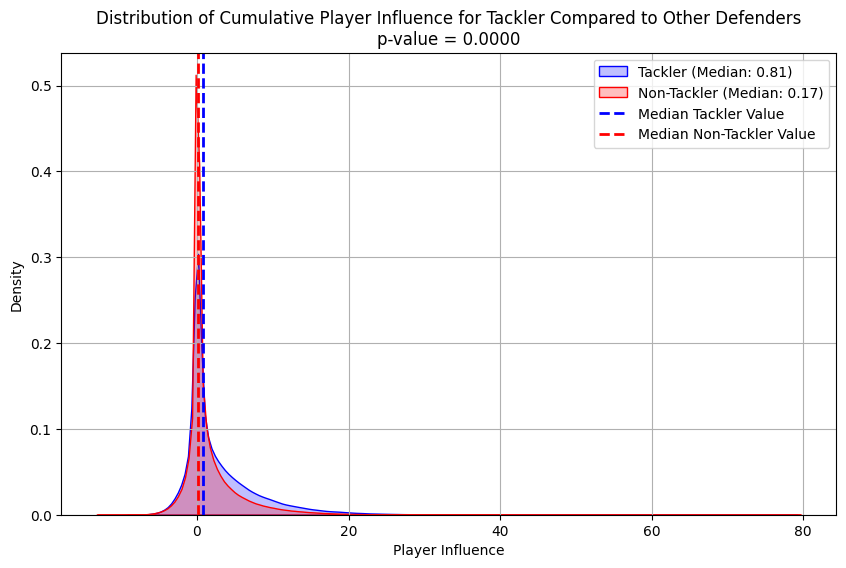

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

# Calculate medians
median_1 = defenders[defenders['IsTackler'] == 1]['cum_player_influence'].median()
median_0 = defenders[defenders['IsTackler'] == 0]['cum_player_influence'].median()

# Perform the Mann-Whitney U test to compare the two distributions
stat, p_value = mannwhitneyu(defenders[defenders['IsTackler'] == 1]['cum_player_influence'], 
                             defenders[defenders['IsTackler'] == 0]['cum_player_influence'], 
                             alternative='two-sided')

# Plot the distribution of player_influence when IsTackler is 1 and 0
plt.figure(figsize=(10, 6))

# Plot distributions using seaborn
sns.kdeplot(defenders[defenders['IsTackler'] == 1]['cum_player_influence'], label=f'Tackler (Median: {median_1:.2f})', color='blue', fill=True)
sns.kdeplot(defenders[defenders['IsTackler'] == 0]['cum_player_influence'], label=f'Non-Tackler (Median: {median_0:.2f})', color='red', fill=True)

# Add vertical lines for medians
plt.axvline(median_1, color='blue', linestyle='--', linewidth=2, label=f'Median Tackler Value')
plt.axvline(median_0, color='red', linestyle='--', linewidth=2, label=f'Median Non-Tackler Value')

# Add titles and labels
plt.title(f'Distribution of Cumulative Player Influence for Tackler Compared to Other Defenders\np-value = {p_value:.4f}')
plt.xlabel('Player Influence')
plt.ylabel('Density')

# Show legend
plt.legend()
plt.grid(True)

# Show plot
plt.show()